# Туннелирование миллимитровых радиоволн

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.cm as cm
from scipy.stats import linregress
import scipy.constants as const

### Зависимость интенсивности прошедешей волны от величины зазора 

Экспериментальные данные

Погрешность измерения 
- $\Delta l = 0.05 \ мм$
- $\Delta I = 2 \ хз$

In [2]:
exp1Data = pd.read_csv("exp_1.csv")
exp1Data.length -= np.min(exp1Data.length)
lError, IError = 0.05, 2

In [3]:
def expon(x: np.ndarray, bias, lamb, bias2, lamb2):
    return lamb2 * np.exp(x * lamb + bias2) + bias

In [4]:
params1, _ = curve_fit(f = expon, 
                      xdata = exp1Data.length, 
                      ydata = exp1Data.I, 
                      p0 = [0,0.2,0,1])
params1Error = 0.07 * params1

In [82]:
xAx = np.linspace(np.min(exp1Data.length) - 0.1, np.max(exp1Data.length) + 0.1, 1000)

fig, ax = plt.subplots(figsize = (16, 9), dpi = 1000)


plt.plot(xAx, 
         expon(xAx,*params1), 
         color = 'pink', 
         label = r'Аппроксимация $\lambda_{2} \cdot exp(\lambda_{1} x + b_{1}) + b_{2}$' + '\n' +  '$ b_2 = {:.2f}, \ \lambda_1 = {:.2f}, \ b_1 = {:.2f}, \ \lambda_2 = {:.2f}$'.format(*params1))
plt.fill_between(xAx, 
                 expon(xAx, *(params1 + params1Error)),
                 expon(xAx, *(params1 - params1Error)),
                 label = 'Ошибка аппроксимации',
                 color = 'blue',
                 alpha = 0.2)
plt.errorbar(exp1Data.length, 
             exp1Data.I, 
             color = 'purple', 
             label = 'Экспериментальные данные',
             xerr = [lError for _ in exp1Data.length],
             yerr = [IError for _ in exp1Data.length],
             fmt = '_')

plt.xlim(min(exp1Data.length) - 0.05, max(exp1Data.length) + 0.05)
plt.xticks(np.arange(min(exp1Data.length),max(exp1Data.length),0.5))

plt.grid()
plt.ylabel("Сила тока $[мкА]$")
plt.xlabel("Ширина щели $[мм]$")
plt.title("Эксперимент 1 - зависимость интенсивности прошедшей волны от размера щели")

plt.table(cellText = np.array([exp1Data.length.round(2), exp1Data.I]).T,
          loc = 'lower left',
          colWidths = [0.1, 0.1],
          colLabels = [r'$Ширина \ щели \ [мм]$', r'$Сила \ тока$'])
plt.legend();
plt.savefig("experiment1.svg")

### Зависимость интенсивности отражённой волны от величины зазора

In [6]:
lReflected = np.array([8.94, 8.76, 8.65, 8.33, 8.22, 7.90, 7.74, 7.41, 7.23, 6.84])
IReflected = np.array([100,  89,  80,  70,  58,  50,  38,  30, 18, 10])

In [7]:
exp2Data = pd.read_csv("exp_2.csv")
exp2Data.length -= np.min(exp2Data.length)
lError, IError = 0.01, 2

In [8]:
params2, _ = curve_fit(f = expon, 
                      xdata = exp2Data.length, 
                      ydata = exp2Data.I, 
                      p0 = [0,0.4,0,0.1])
params2Error = 0.01 * params2

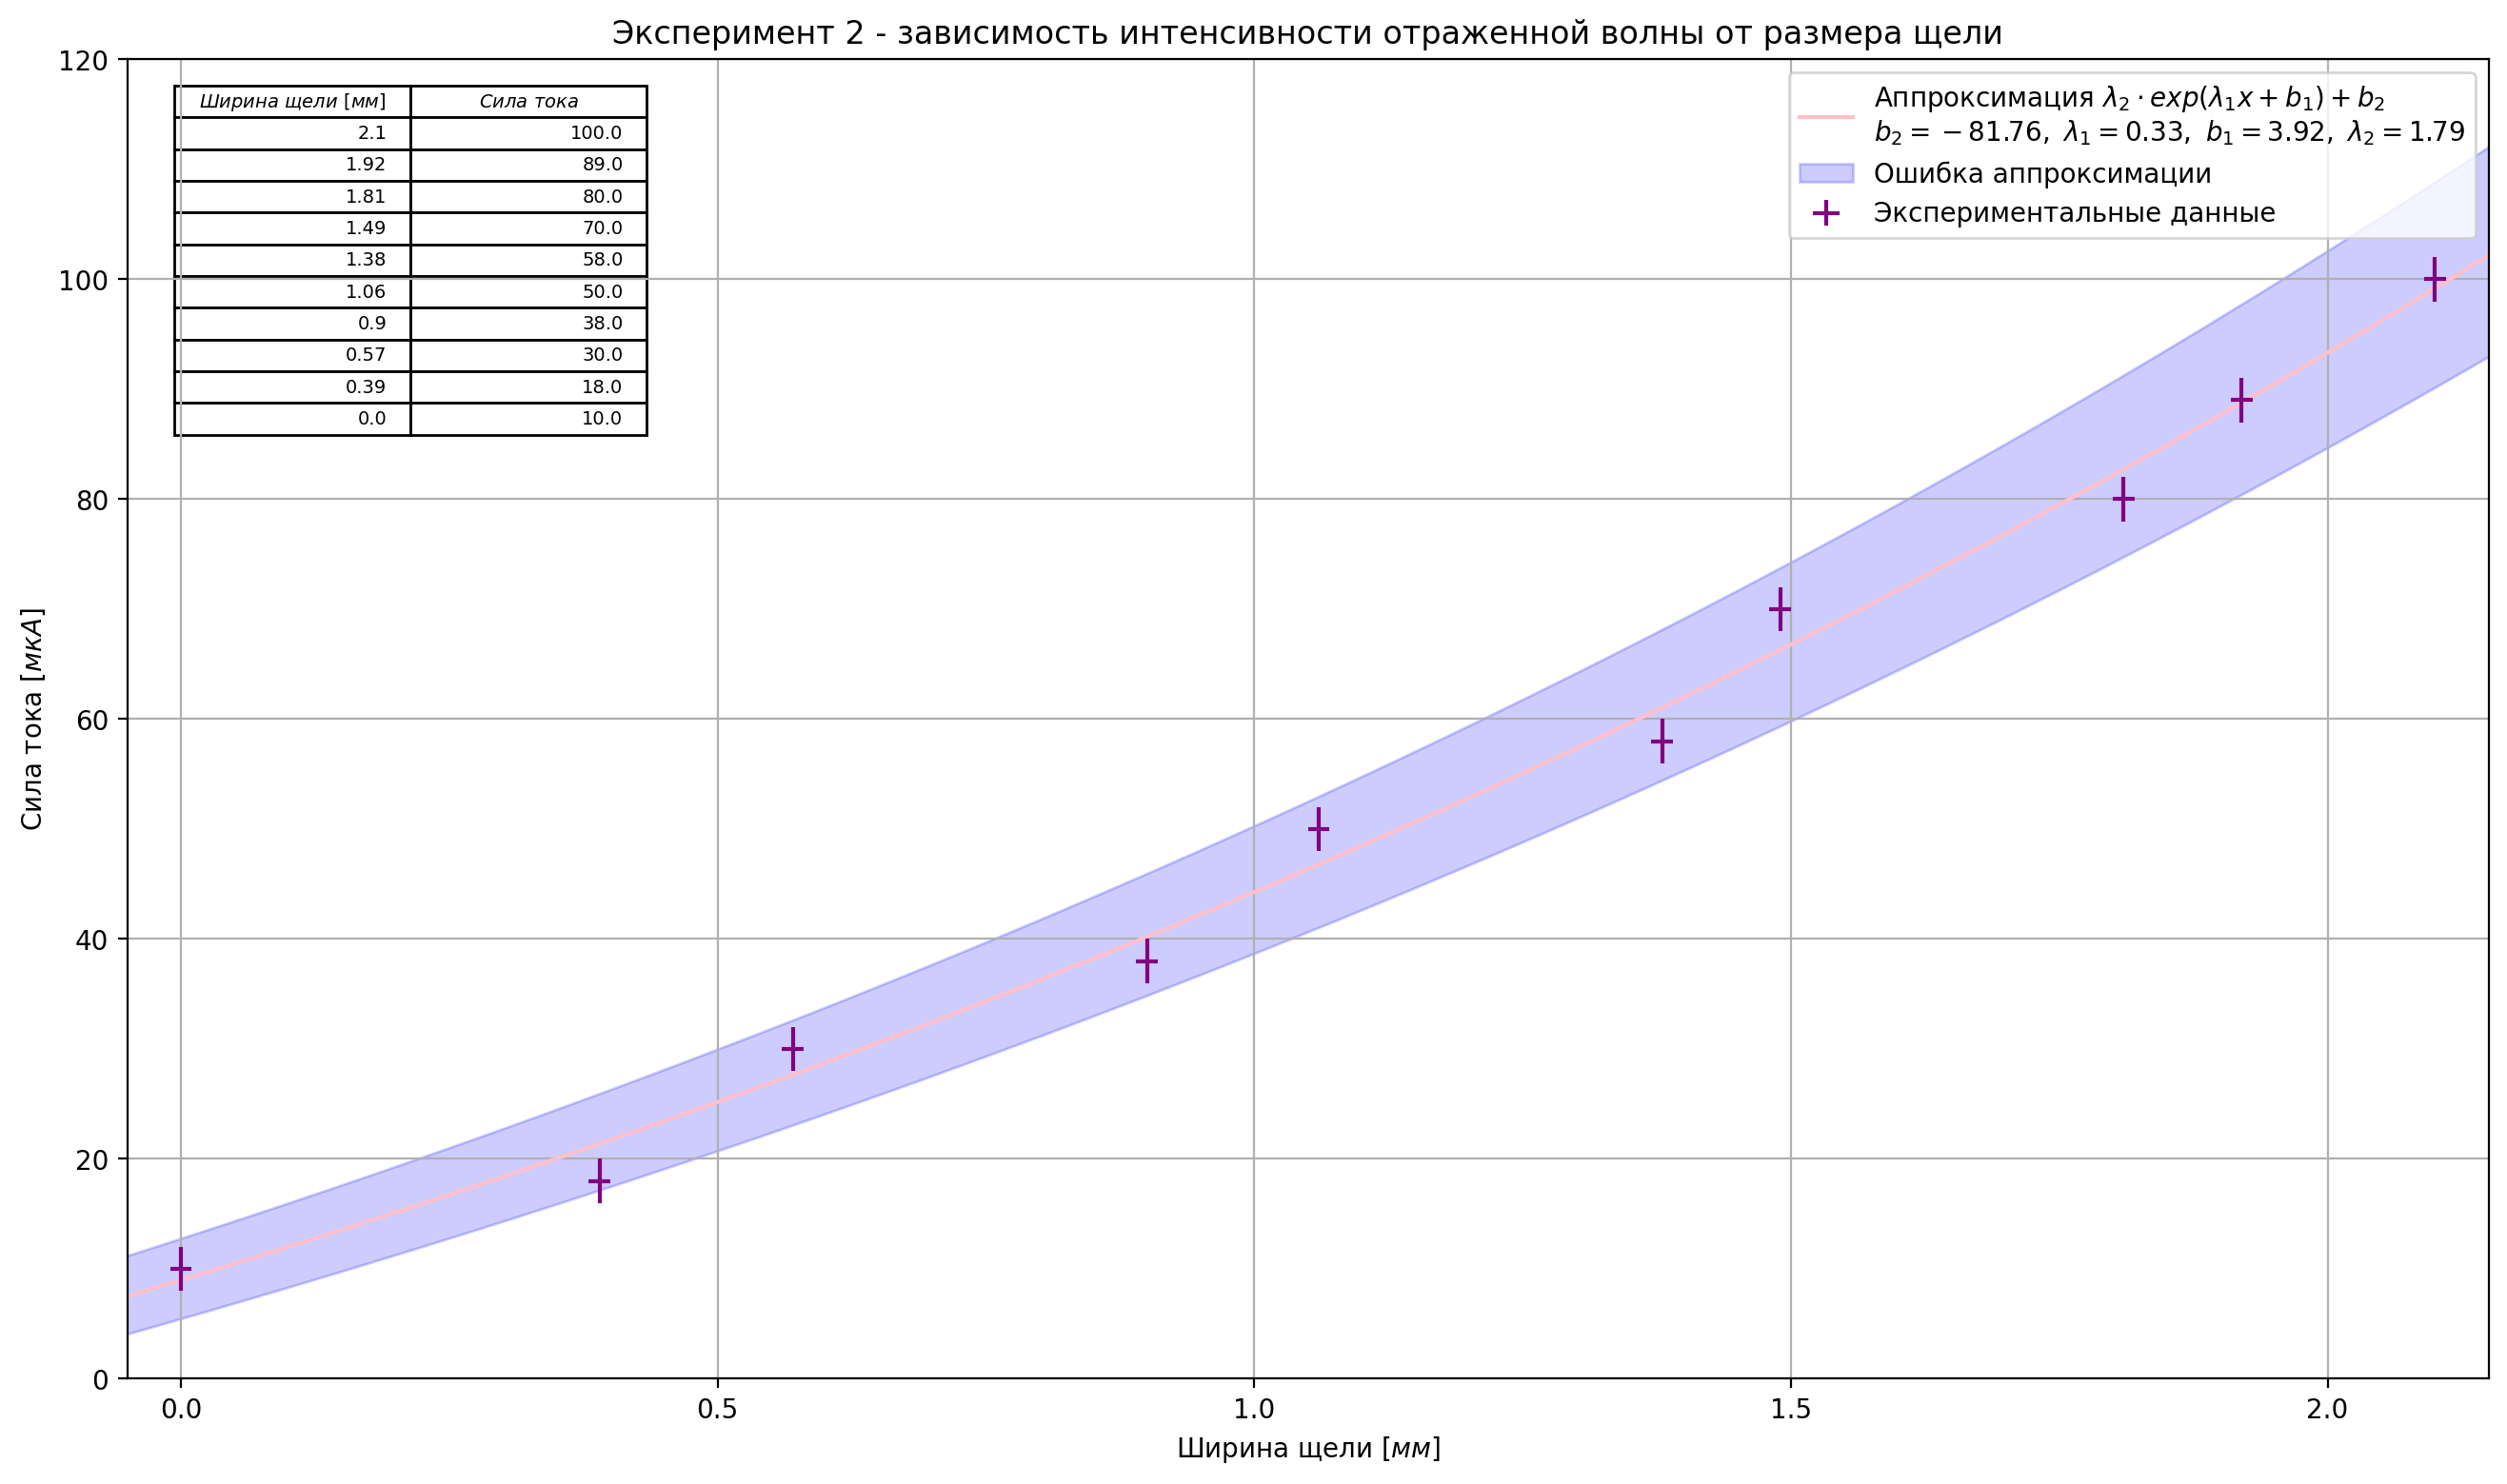

In [9]:
xAx = np.linspace(np.min(exp1Data.length) - 0.1, np.max(exp1Data.length) + 0.1, 1000)

fig, ax = plt.subplots(figsize = (16, 9), dpi = 1000)


plt.plot(xAx, 
         expon(xAx,*params2), 
         color = 'pink', 
         label = r'Аппроксимация $\lambda_{2} \cdot exp(\lambda_{1} x + b_{1}) + b_{2}$' + '\n' +  '$ b_2 = {:.2f}, \ \lambda_1 = {:.2f}, \ b_1 = {:.2f}, \ \lambda_2 = {:.2f}$'.format(*params2))
plt.fill_between(xAx, 
                 expon(xAx, *(params2 + params2Error)),
                 expon(xAx, *(params2 - params2Error)),
                 label = 'Ошибка аппроксимации',
                 color = 'blue',
                 alpha = 0.2)
plt.errorbar(exp2Data.length, 
             exp2Data.I, 
             color = 'purple', 
             label = 'Экспериментальные данные',
             xerr = [lError for _ in exp2Data.length],
             yerr = [IError for _ in exp2Data.length],
             fmt = '_')

plt.xlim(min(exp2Data.length) - 0.05, max(exp2Data.length) + 0.05)
plt.xticks(np.arange(min(exp2Data.length),max(exp2Data.length),0.5))
plt.ylim(0, 120)

plt.grid()
plt.ylabel("Сила тока $[мкА]$")
plt.xlabel("Ширина щели $[мм]$")
plt.title("Эксперимент 2 - зависимость интенсивности отраженной волны от размера щели")

plt.table(cellText = np.array([exp2Data.length.round(2), exp2Data.I]).T,
          loc = 'upper left',
          colWidths = [0.1, 0.1],
          colLabels = [r'$Ширина \ щели \ [мм]$', r'$Сила \ тока$'])
plt.legend();
plt.savefig("experiment2.svg")

### Коэффициенты отражения и преломления

In [10]:
T_coeff = exp1Data.I / np.max(exp1Data.I)
R_coeff = exp2Data.I / np.max(exp2Data.I)
interpT = expon(xAx, *params1) / (np.max(exp1Data.I))
interpR = expon(xAx, *params2) / (np.max(exp2Data.I))
error_coeff = 0.03

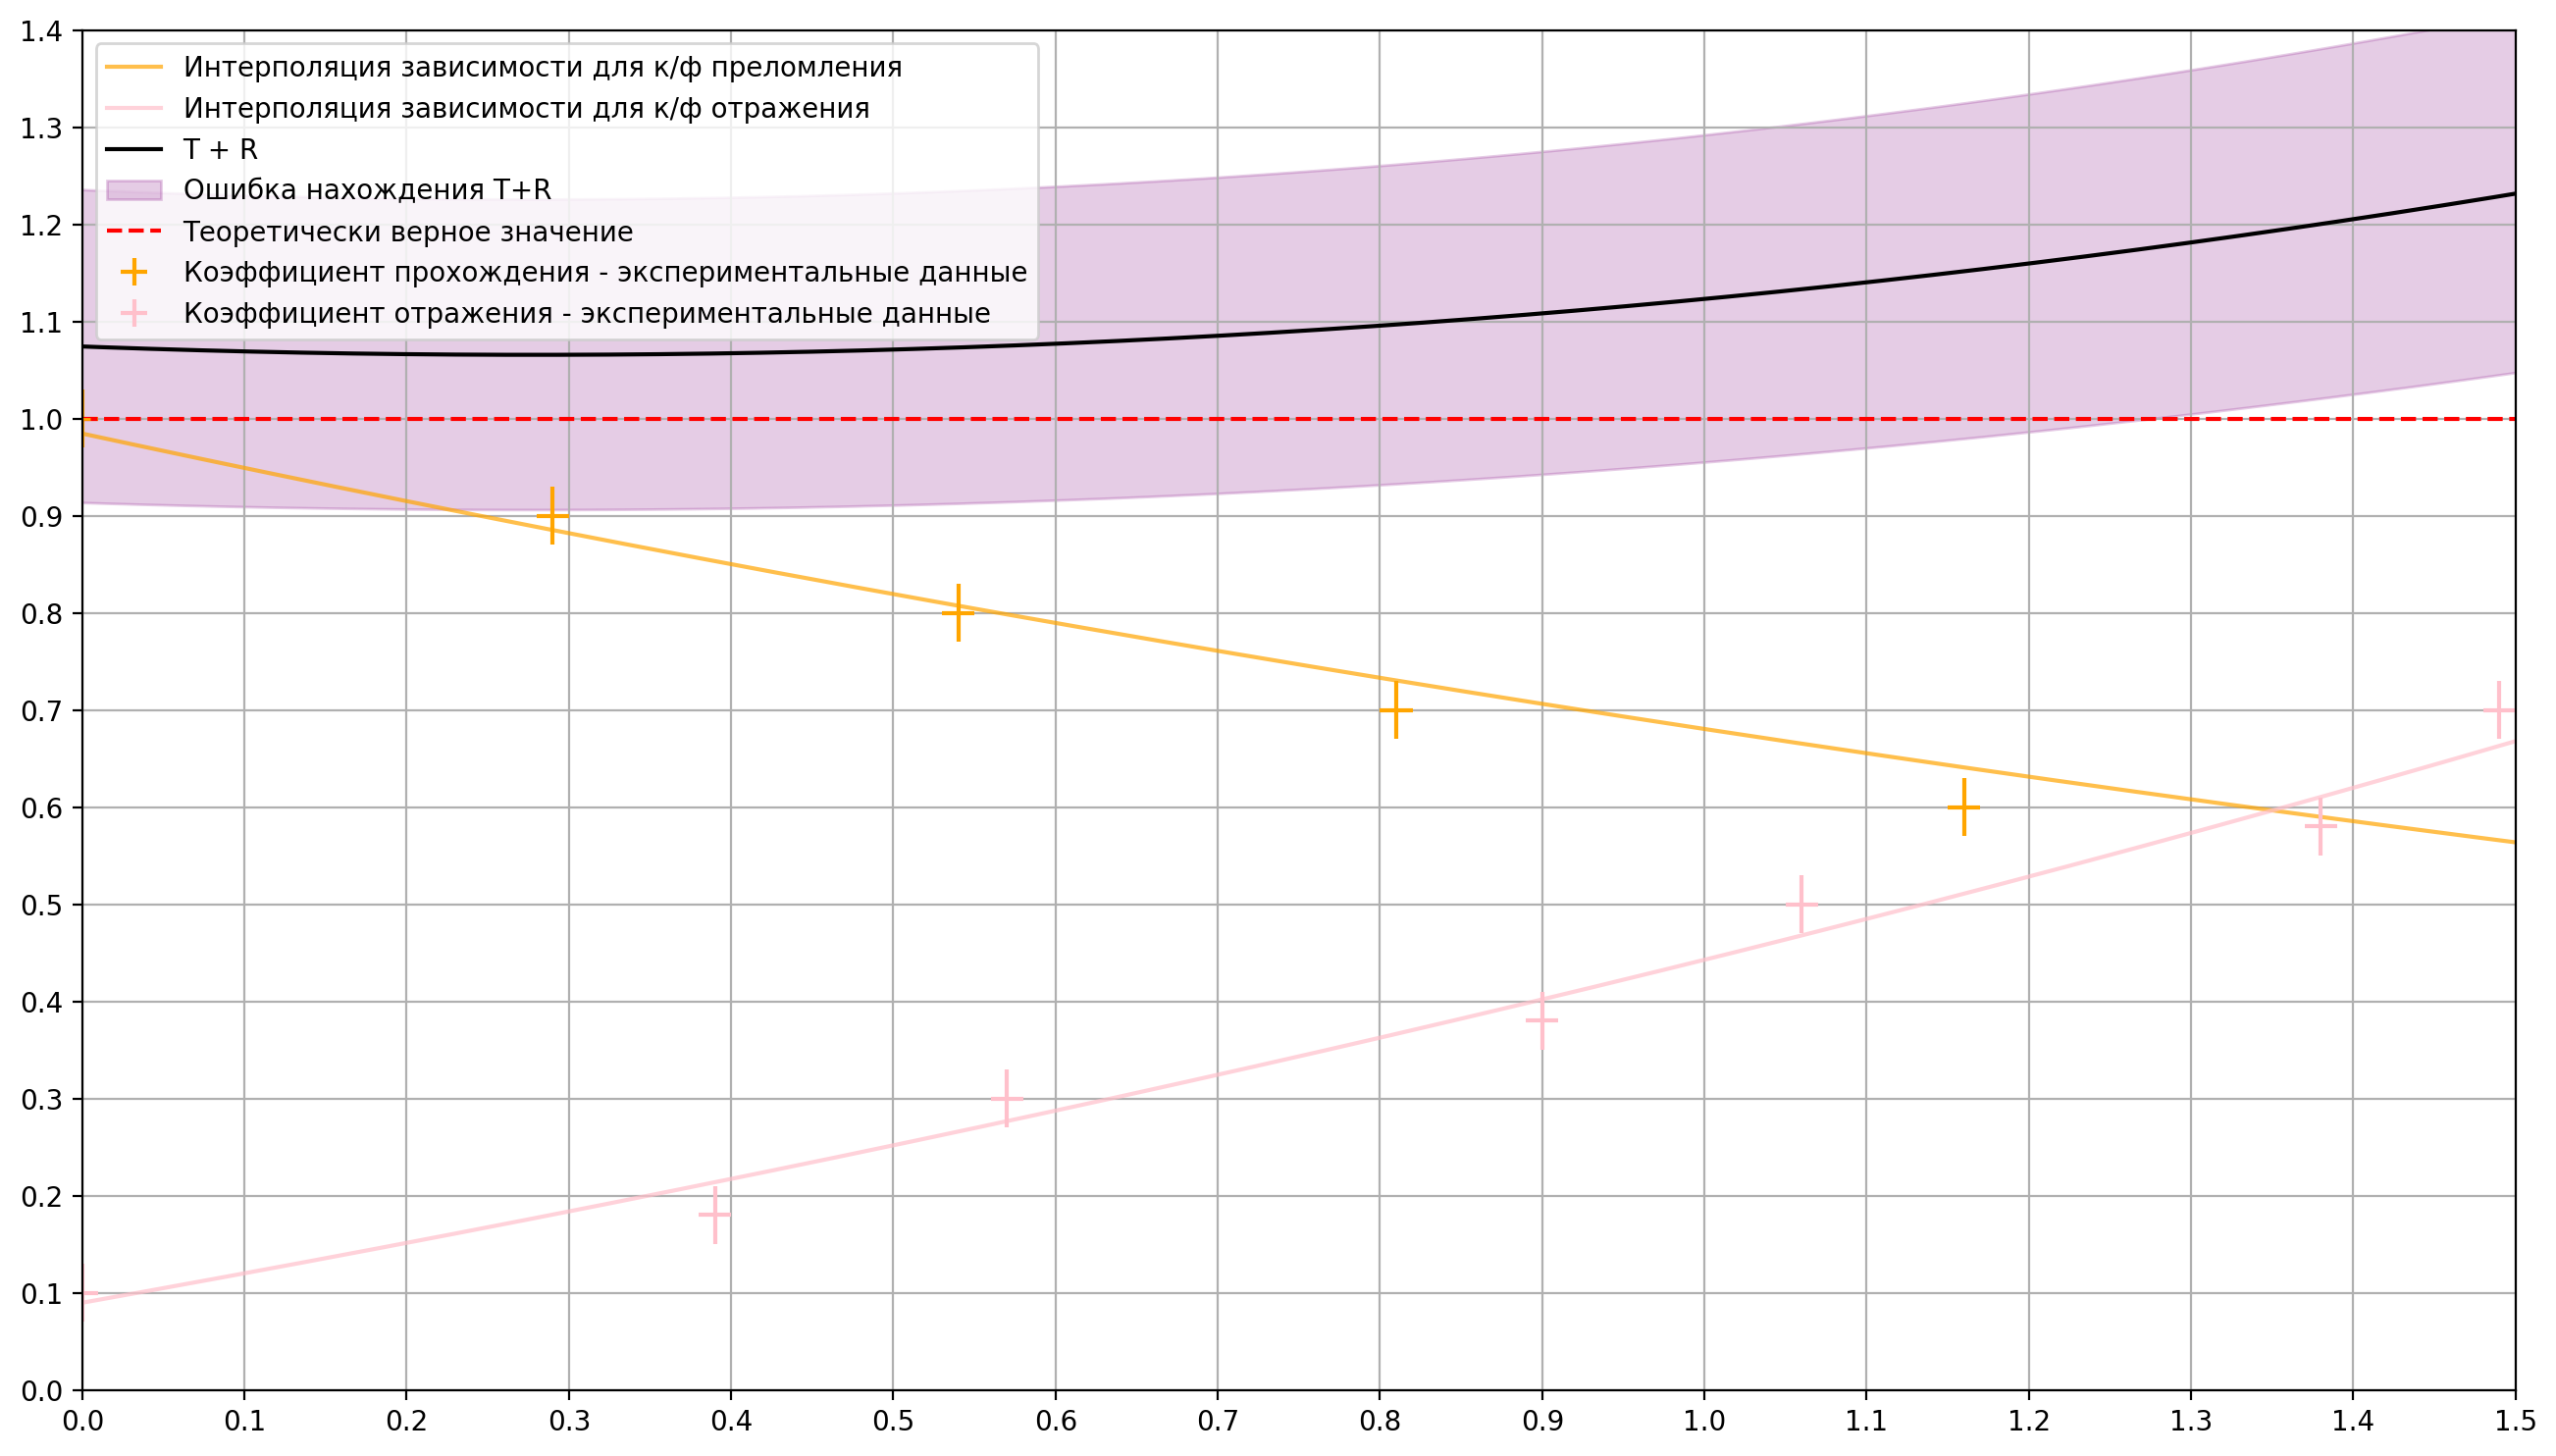

In [11]:
plt.figure(figsize = (16, 9), dpi = 200)
plt.errorbar(exp1Data.length, 
             T_coeff,
             xerr = [lError for _ in T_coeff],
             yerr = [error_coeff for _ in T_coeff],
             fmt = '_',
             color = 'orange',
             label = 'Коэффициент прохождения - экспериментальные данные')
plt.plot(xAx, 
         interpT, 
         label = 'Интерполяция зависимости для к/ф преломления',
         color = 'orange',
         alpha = 0.7)

plt.errorbar(exp2Data.length, 
             R_coeff,
             xerr = [lError for _ in T_coeff],
             yerr = [error_coeff for _ in T_coeff],
             fmt = '_',
             color = 'pink',
             label = 'Коэффициент отражения - экспериментальные данные')
plt.plot(xAx, 
         interpR, 
         label = 'Интерполяция зависимости для к/ф отражения',
         color = 'pink',
         alpha = 0.7)
plt.plot(xAx, 
         interpR + interpT,
         color = 'black',
         label = 'T + R')

plt.fill_between(xAx, 
                 interpR + interpT + 0.15 * (interpR + interpT),
                 interpR + interpT - 0.15 * (interpR + interpT),
                 label = 'Ошибка нахождения T+R',
                 color = 'purple',
                 alpha = 0.2)

plt.axhline(1, label = 'Теоретически верное значение', color = 'red', linestyle = '--')

plt.ylim(0, 1)
plt.xlim(0, 1.5)
plt.grid()
plt.xticks(np.arange(0, 1.6, 0.1))
plt.yticks(np.arange(0, 1.5, 0.1))
plt.legend()
plt.savefig("TplusR.jpg")

### Рассчет длины затухания

Зависимость $ln(T)$ от z

In [24]:
MNK = linregress(exp1Data.length,
                 np.log(T_coeff))
xAx = np.linspace(0, 5.5, 1000)

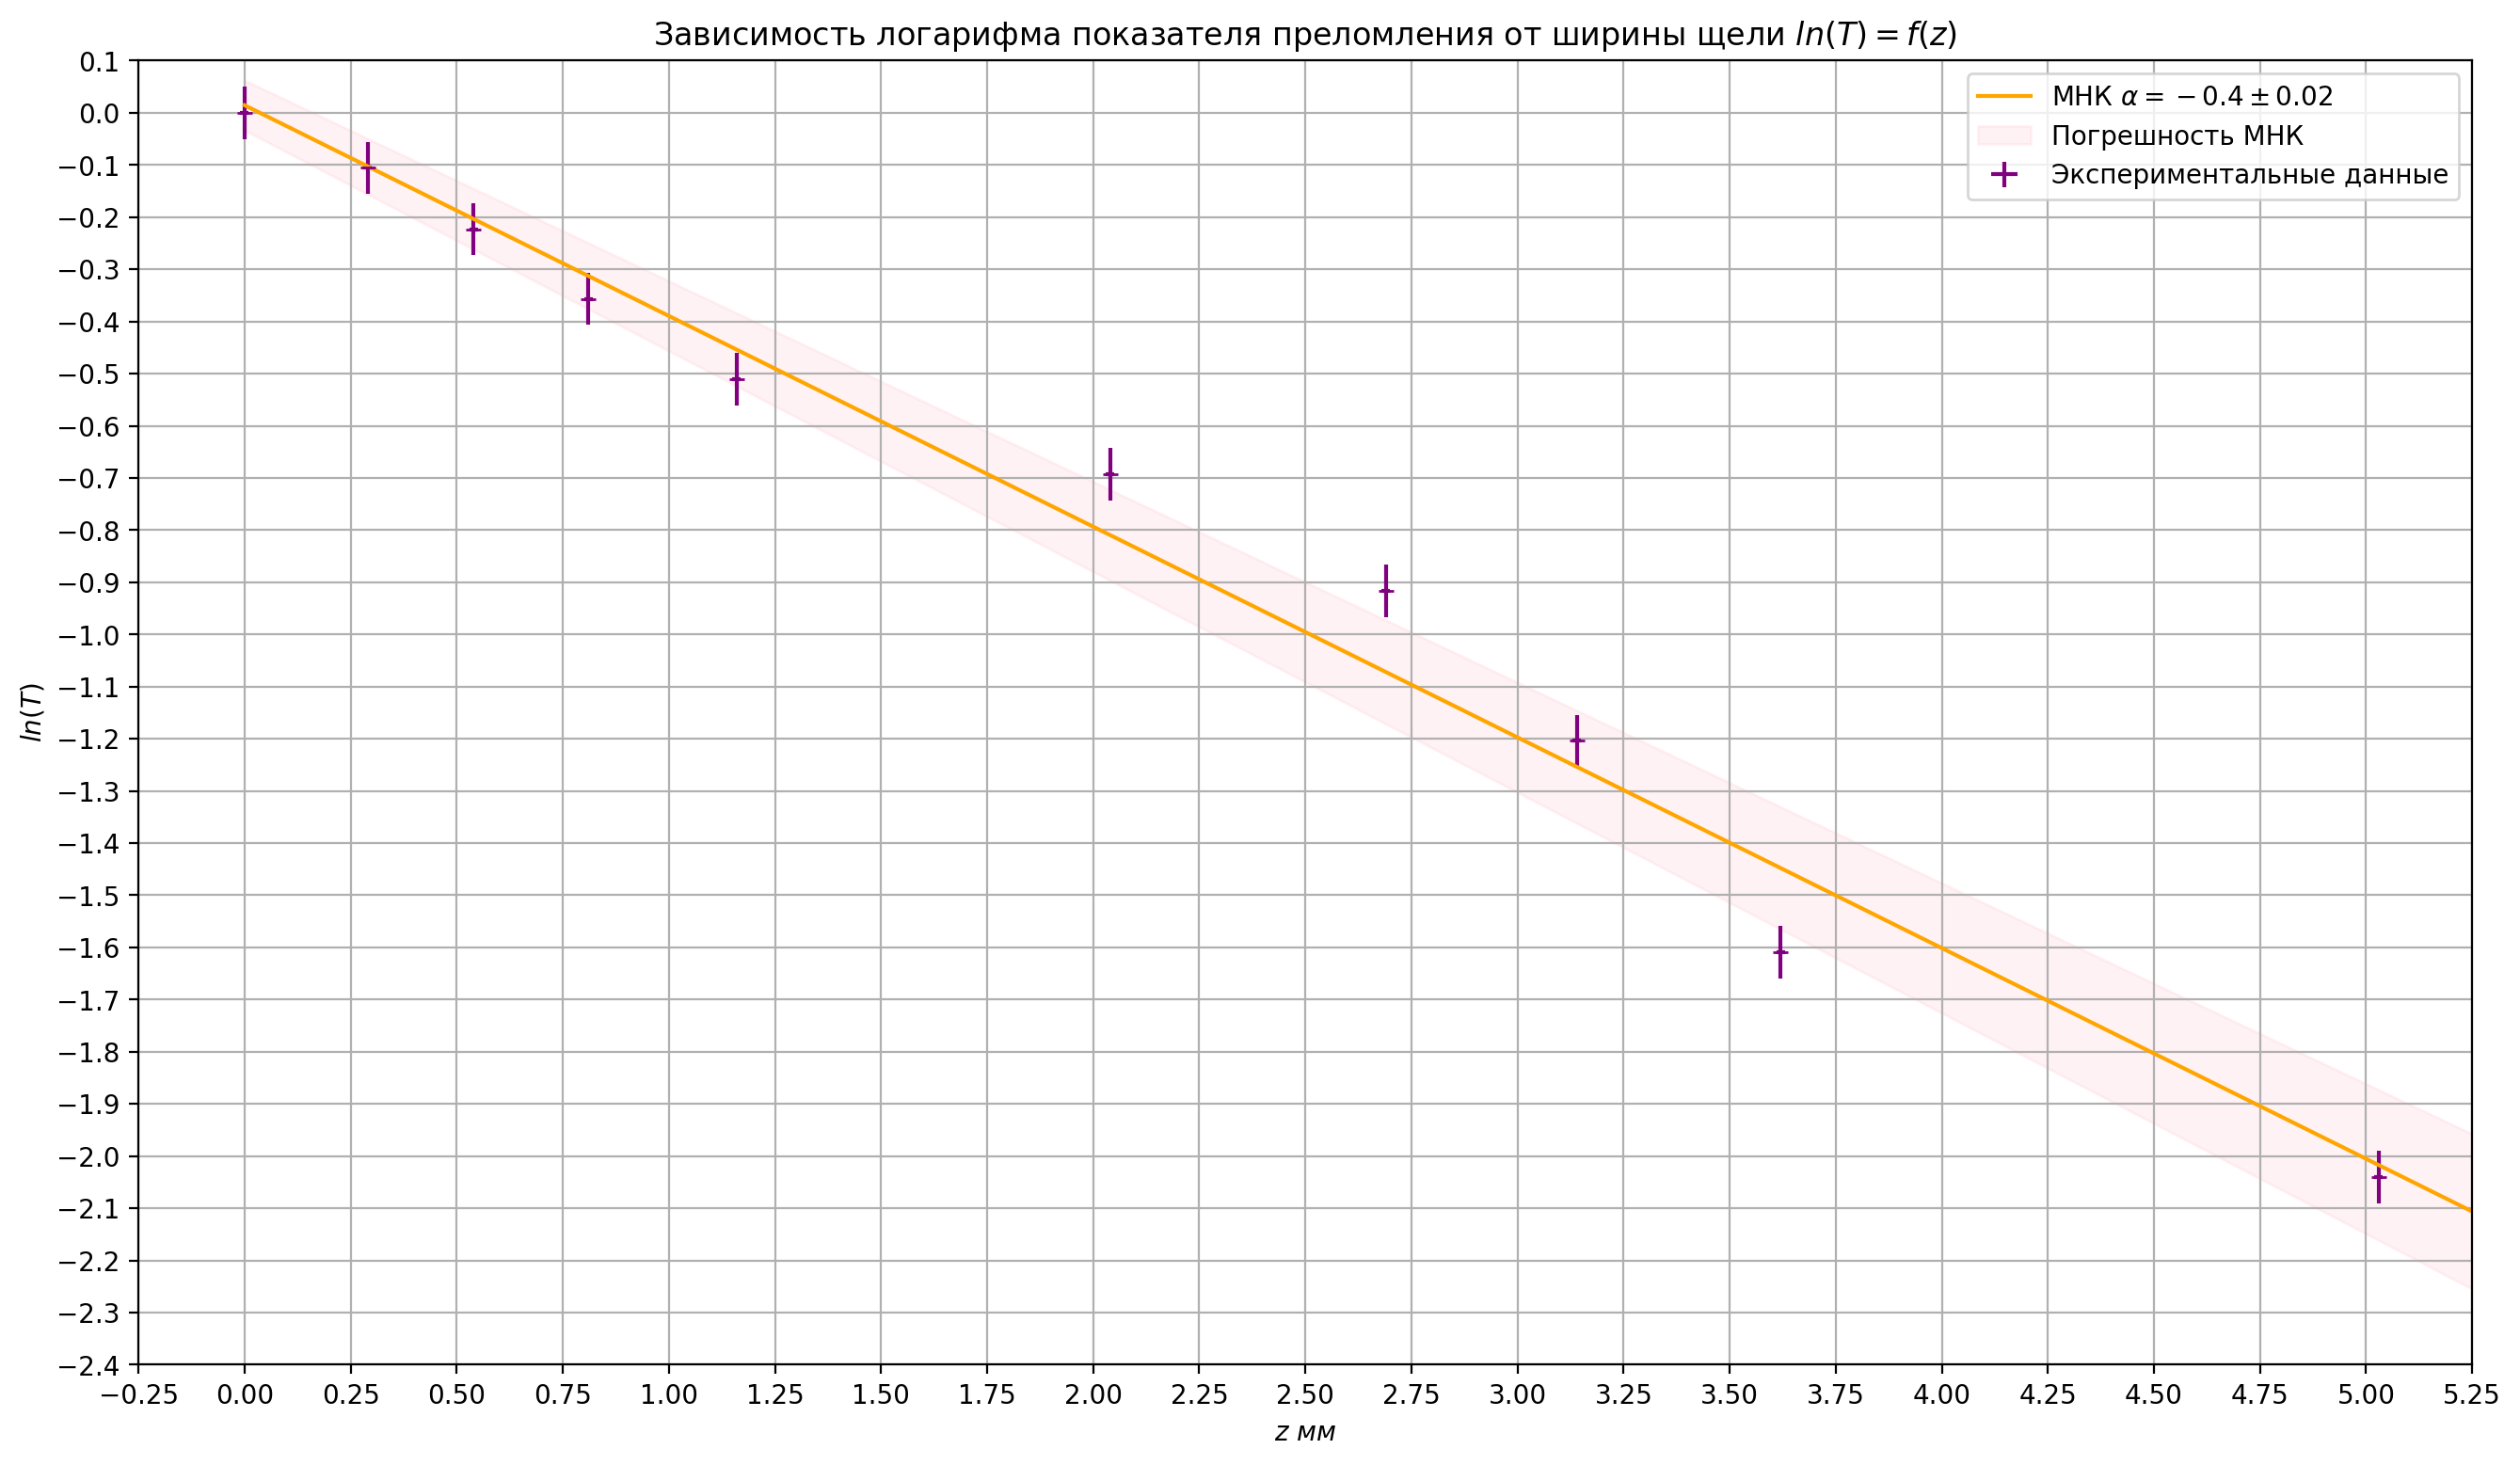

In [59]:
plt.figure(figsize = (16, 9), dpi = 200)

plt.errorbar(exp1Data.length, 
             np.log(T_coeff),
             xerr = [lError for _ in exp1Data.length],
             yerr = np.abs([0.05 for _ in T_coeff]),
             fmt = '_',
             color = 'purple',
             label = 'Экспериментальные данные')
plt.plot(xAx, 
         MNK.slope * xAx + MNK.intercept,
         color = 'orange',
         label = r'МНК $\alpha = {} \pm {}$'.format(round(MNK.slope,2), round(MNK.stderr, 2)))
plt.fill_between(xAx,
                 (MNK.slope + MNK.stderr) * xAx + MNK.intercept + MNK.intercept_stderr,
                 (MNK.slope - MNK.stderr) * xAx + MNK.intercept - MNK.intercept_stderr,
                 alpha = 0.2,
                 color = 'pink',
                 label = 'Погрешность МНК')
plt.yticks(np.arange(-2.5, 0.2, 0.1))
plt.ylim(-2.4, 0.1)
plt.xticks(np.arange(-0.25, 5.5, 0.25))
plt.xlim(-0.25, 5.25)
plt.grid()
plt.legend();
plt.ylabel('$ln(T)$')
plt.xlabel('$z \ мм$')
plt.title('Зависимость логарифма показателя преломления от ширины щели $ln(T) = f(z)$')
plt.savefig('Длина_затухания.jpg')

Длину затухания определим по формуле:
$$
I = e^{-z / \Lambda} \to \Lambda = -z / \operatorname{ln}(I)
$$

In [63]:
decay_length = - 1 / MNK.slope
decay_length_error = np.abs(MNK.stderr * decay_length / MNK.slope ) + 0.05
print(f'Длина затухания = {decay_length} мм +/- {decay_length_error}')
print(decay_length_error)
print(decay_length_error / decay_length)

Длина затухания = 2.4755898792648305 мм +/- 0.1675440582322214
0.1675440582322214
0.06767843883817158


$$
\Lambda = \frac{\lambda_{2}}{4\pi \sqrt{n^{2} sin^{2}(\phi_{1}) - 1}} \to
 n \operatorname{sin}(\phi_{1}) = \sqrt{\frac{16 \pi^{2} \Lambda^{2}}{\lambda_{2}^{2}} + 1}
$$

Частота генератора $36.95 \ гГц$

In [81]:
lambda_2 = const.c * 36.95 * np.power(0.1, 9)

nSine = np.sqrt((16 * np.power(np.pi, 2) * np.power(decay_length/100, 2) / np.power(lambda_2, 2)) + 1)
print(f'n = {nSine / np.sin(45 * np.pi / 180)}')

n = 1.4147711411440713
